# Vectorization

## Background

We've already seen several versions of how to tranform a corpus into a matrix representation. There's code to do it from start to finish in [notebook 04](https://github.com/wilkens-teaching/textmining/blob/master/notebooks/04%20Vectorization.ipynb). Your task in this assignment is to make sure you can perform vectorization using Scikit-learn and to explore the effects of different vectorization options.

## The basics

First, adapt the code toward the end of notebook 04 (under the heading "Sklearn and visualize") to carry out very basic vectorization of our literary corpus using `TfidfVectorizer` with **default** settings. Visualize your results as demonstrated (without colorization by class). 

Note that the code in the demo notebook *does not* use the default settings. Modify it so that it does. You'll also need to specify the appropriate imports and file locations, of course. Your output should look like this, assuming you copy over the plotting settings from the demo:

![Basic vectorization result](../data/images/ps04-vectors.png)

In [1]:
%matplotlib inline

# Imports
import nltk
import os
import string
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Import our corpus readers
sys.path.append(os.path.join('..', 'libraries'))
import TMN

# Set up our corpus
text_dir = os.path.join('..', 'data', 'texts')
img_dir = os.path.join('..', 'data', 'images')
corpus = TMN.TMNCorpusReader(text_dir)

40 documents, 53864 features.
40 documents, 2 PCA features.
Explained variance by component: [0.14561575 0.09643113]


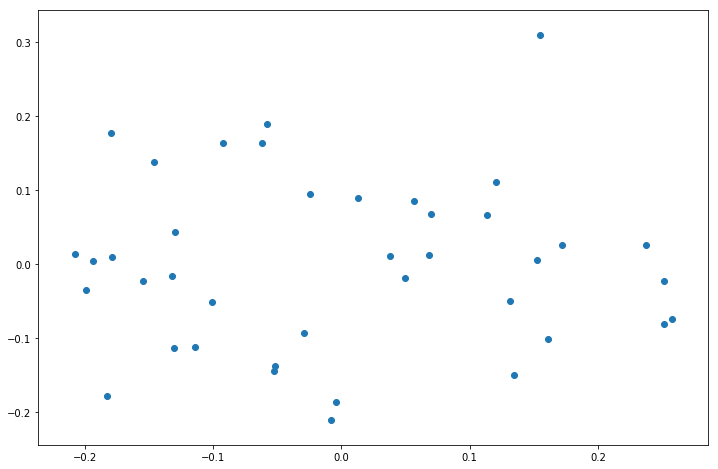

In [2]:
# Vectorize
tfidf = TfidfVectorizer() # Set up vectorizer with defaults
vectors = tfidf.fit_transform(corpus.docs()) # Perform vectorization
print(f'{vectors.shape[0]} documents, {vectors.shape[1]} features.')

# Reduce dimensions with PCA
pca = PCA(n_components=2) # Set up PCA
reduced = pca.fit_transform(vectors.toarray()) # Perform PCA on vectors
print(f'{reduced.shape[0]} documents, {reduced.shape[1]} PCA features.')
print("Explained variance by component:", pca.explained_variance_ratio_)

# Plot with matplotlib
plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(reduced[:,0], reduced[:,1])
plt.savefig(os.path.join(img_dir, 'ps04-vectors.png'), dpi=300) # Save to images directory

### Extra: Examine component weights

One of the nice things about PCA is that it allows for easy inspection of the feature weights. That is, you can see which input features are most heavily represented in each of the output components. Now, I say "easy," but we have 53,000+ input features, so it'll be hard to really make sense of their individual weights. Still, let's take a look. Note that we use absolute values for the feature weights, since direction of correlation isn't what we care about.

In [3]:
weights = pd.DataFrame(pca.components_, columns=tfidf.vocabulary_, index=['PC0', 'PC1']).abs().T
weights.sort_values(by='PC0', ascending=False).head(20)

,PC0,PC1
saronic,0.550706,0.185194
rackett,0.328589,0.175393
cocoon,0.298182,0.307133
upkeep,0.296015,0.355623
distractingly,0.271828,0.154495
gallipots,0.174397,0.194615
recommends,0.152091,0.004577
exhausting,0.138514,0.039432
chronic,0.110255,0.434879
unentered,0.100156,0.034635


## Color by class label

Again adapting the demo code, generate a plot of the vectorized data that colors the individual points by the nation and gender to which they belong. To be clear, you'll make single plot with four colors (for classes 'BF', 'BM', 'AF', and 'AM'). 

As an optional challenge, set the colors such that they are meaningfully related. For example, Brits in red, Americans in blue, with male-authored books a lighter shade of those same colors. You may want to consult the [list of Matplotlib named colors](https://matplotlib.org/examples/color/named_colors.html).

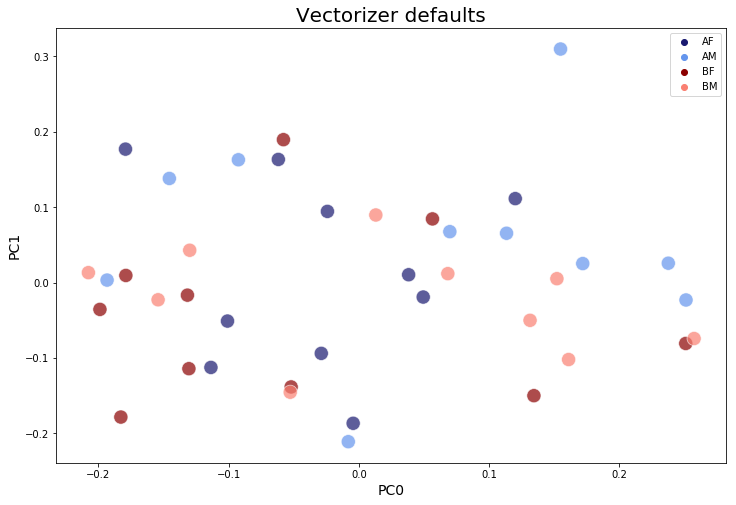

In [4]:
# Get document labels
nations = [] # Just the nation labels (e.g., 'A')
natgens = [] # Nation-gender labels (e.g., 'AF')
genders = [] # Just gender labels (e.g., 'F')

for file in corpus.fileids():
    a, b, c = corpus.categories(fileids=file)
    nations.append(a)
    natgens.append(b)
    genders.append(c)

# Set plotting colors
colors = {
    'AM': 'cornflowerblue',
    'AF': 'midnightblue',
    'BM': 'salmon',
    'BF': 'darkred'
}

# Plot by nation and gender
sns.scatterplot(reduced[:,0], reduced[:,1], hue=natgens, palette=colors, s=200, alpha=0.7)
plt.xlabel("PC0", size=14)
plt.ylabel("PC1", size=14)
plt.title("Vectorizer defaults", size=20)
plt.show()

## Vectorization alternatives

Now it's time to explore some different settings for vectorization in order to see how they affect our output. We'll want to visualize the alternatives, so our first task is to write a function that produces a plot like the one above, given an input feature matrix and some visual settings. Here's a skeleton; complete it to spec.

In [5]:
def plot_vectors(features, labels, colors, title):
    """
    Takes a matrix of (dimension-reduced) features,
      a list of class labels,
      a dictionary of class-color mappings,
      and a string to use as a title for the plot.
    Displays a simple 2D plot.
    Returns None.
    """
    import seaborn as sns
    sns.scatterplot(features[:,0], features[:,1], hue=labels, palette=colors, s=200, alpha=0.7)
    plt.xlabel("PC0", size=14)
    plt.ylabel("PC1", size=14)
    plt.title(title, size=20)
    plt.show()
    return None

Next, read the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for `TfidfVectorizer`. Get a sense of the different options, then try out some alternatives, plotting the results of each as you go. You can do this in a series of cells, or by iterating over the alternatives. Among those options you might explore in particular:

* `lowercase`
* `preprocessor`. You might try the simple stemming preprocessor we wrote in the demo notebook, or you could get more ambitious with one of your own.
* `n-gram_range`. What difference does including 2- or 3-grams as features make? Note that you need to supply the range as a tuple, e.g., `(1, 2)`.
* `max_df` and `min_df`. You can set these in lieu of a list of stopwords. 
* `binary` and `use_idf`. We can try with and without IDF weighting and feature binarization.

Note, though, that even this short list could easily produce dozens of unique vectorizations. Try at least eight, in whatever combinations strike you as interesting.

40 documents, 48784 features.
Explained variance: 0.076


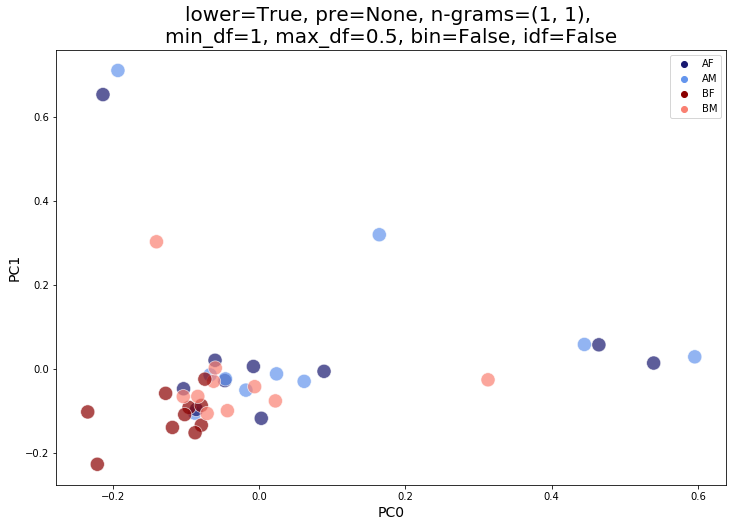

40 documents, 48784 features.
Explained variance: 0.065


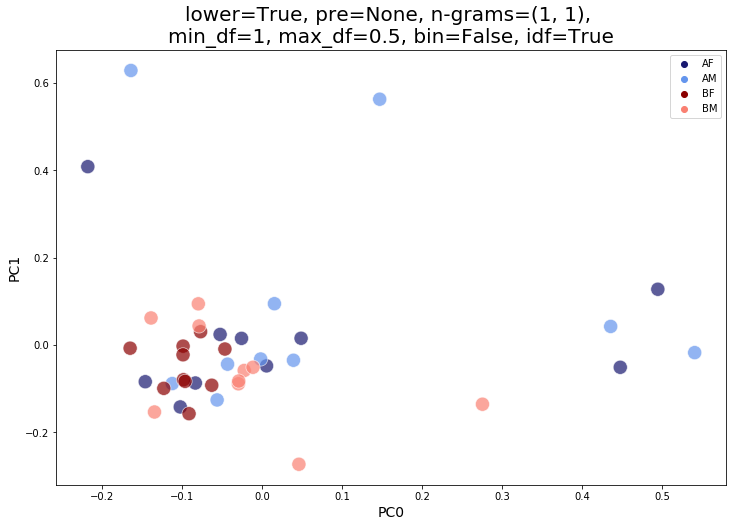

40 documents, 48784 features.
Explained variance: 0.089


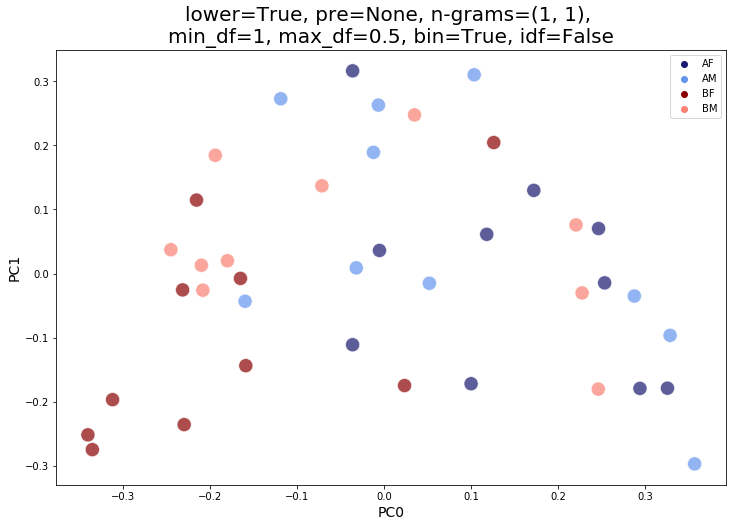

40 documents, 48784 features.
Explained variance: 0.077


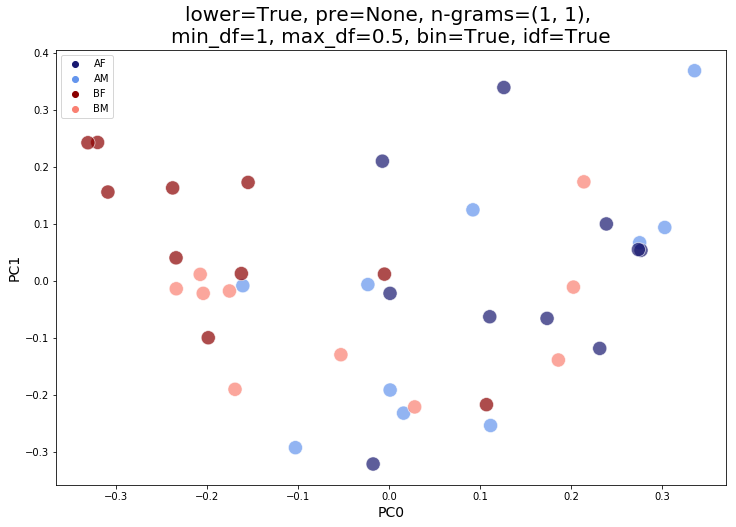

40 documents, 53864 features.
Explained variance: 0.414


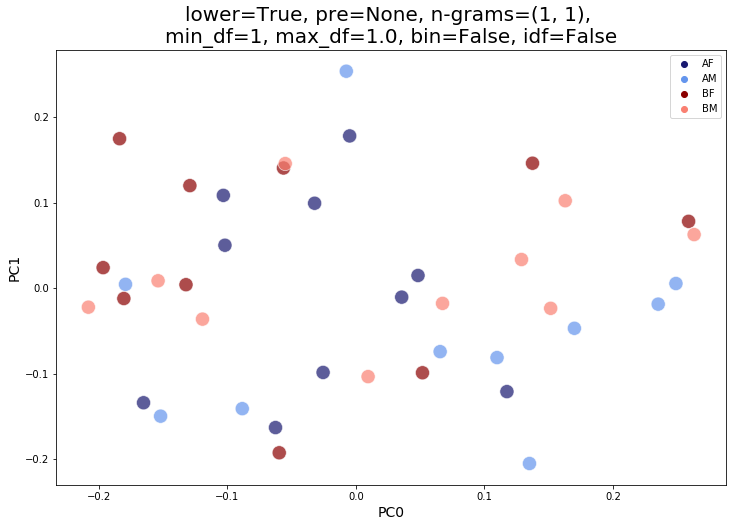

40 documents, 53864 features.
Explained variance: 0.242


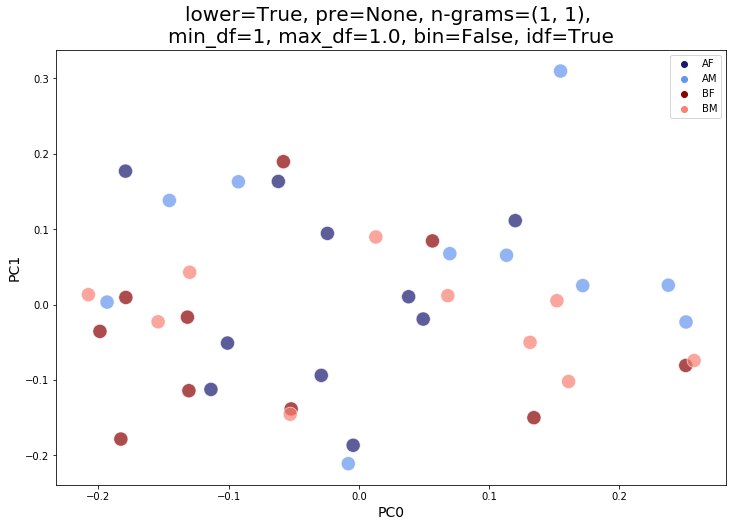

40 documents, 53864 features.
Explained variance: 0.105


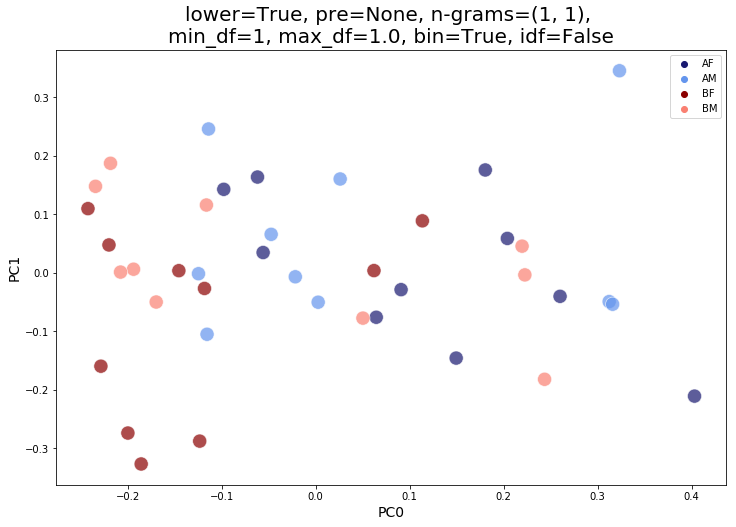

40 documents, 53864 features.
Explained variance: 0.08


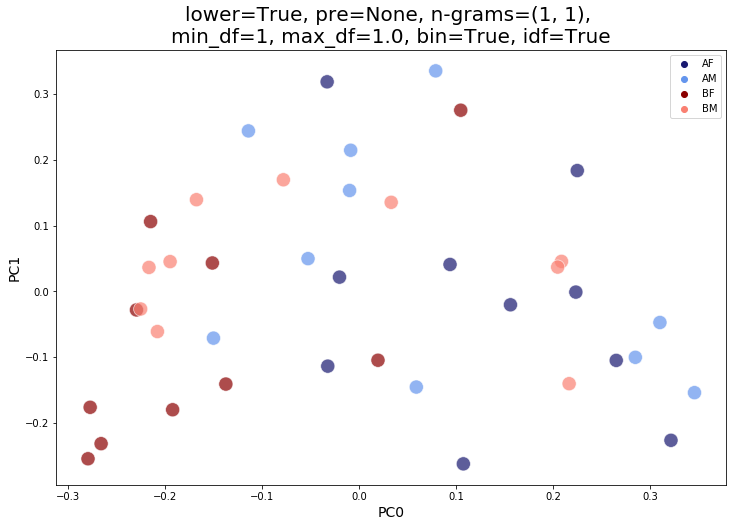

40 documents, 26968 features.
Explained variance: 0.084


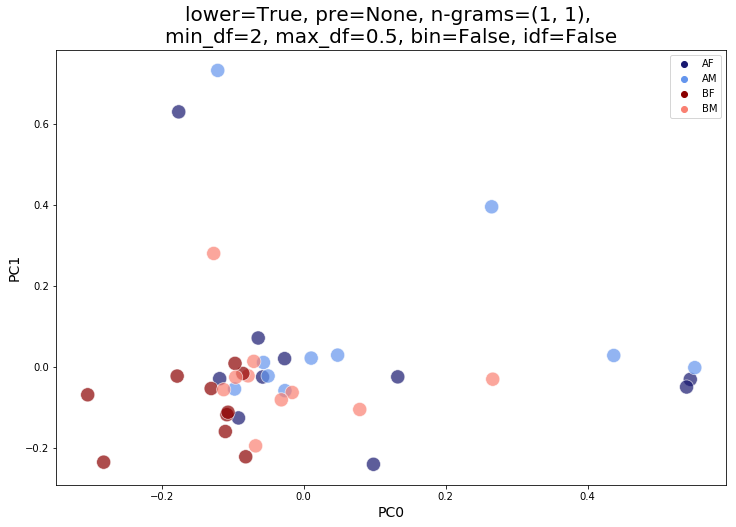

40 documents, 26968 features.
Explained variance: 0.076


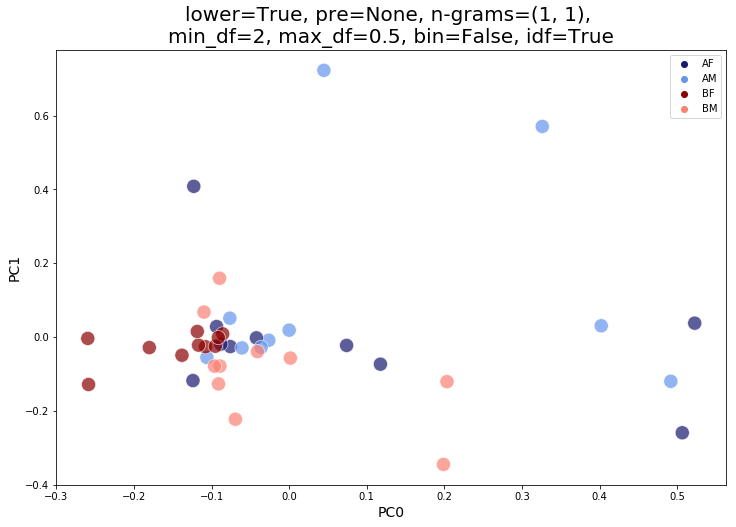

40 documents, 26968 features.
Explained variance: 0.095


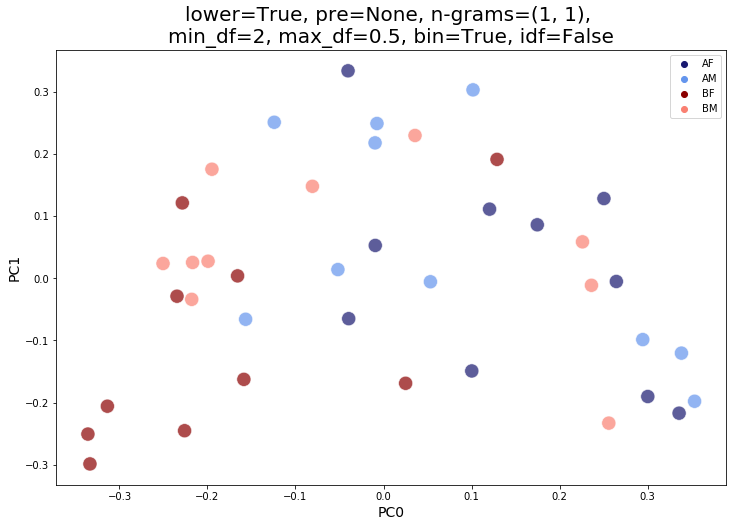

40 documents, 26968 features.
Explained variance: 0.085


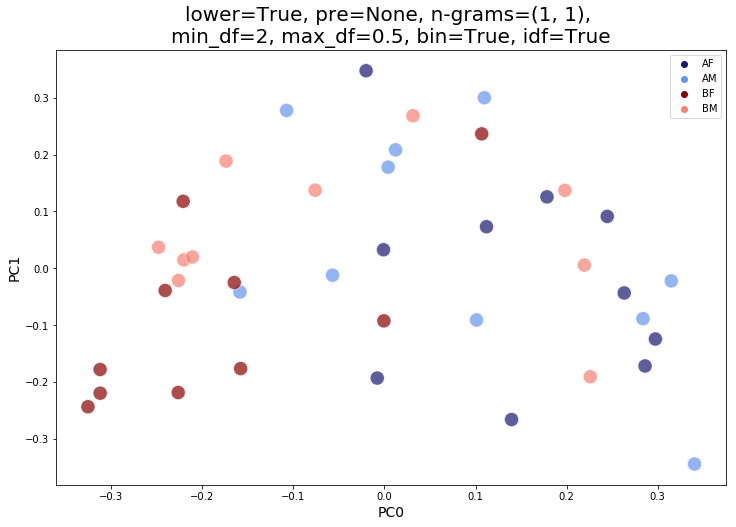

40 documents, 32048 features.
Explained variance: 0.425


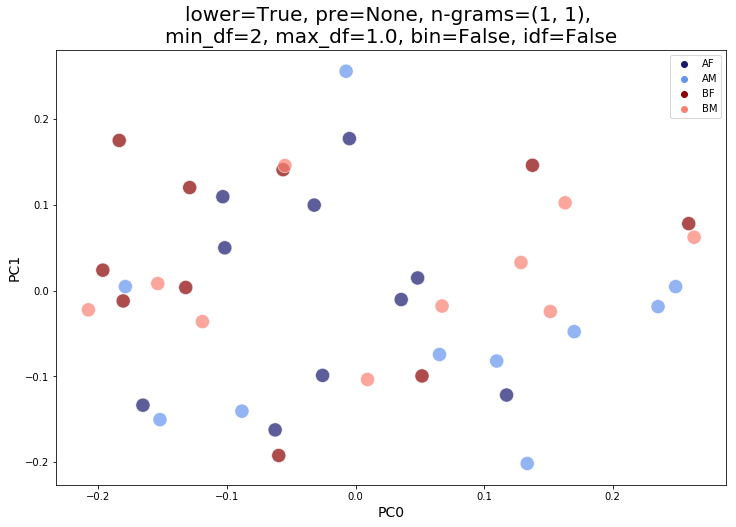

40 documents, 32048 features.
Explained variance: 0.297


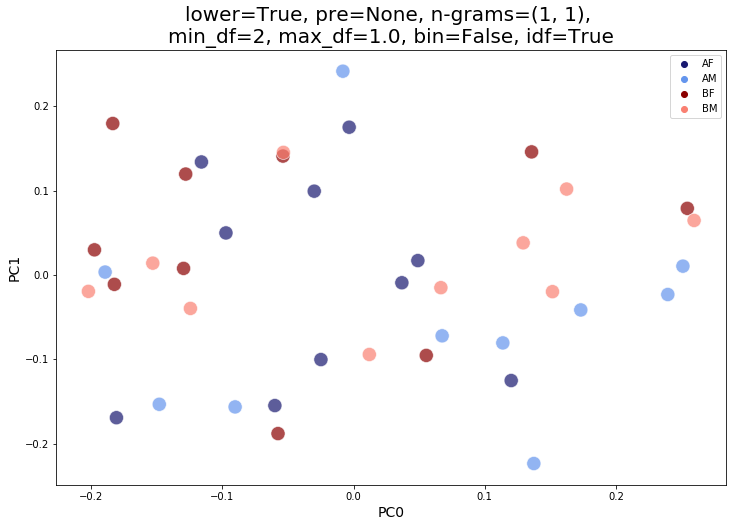

40 documents, 32048 features.
Explained variance: 0.112


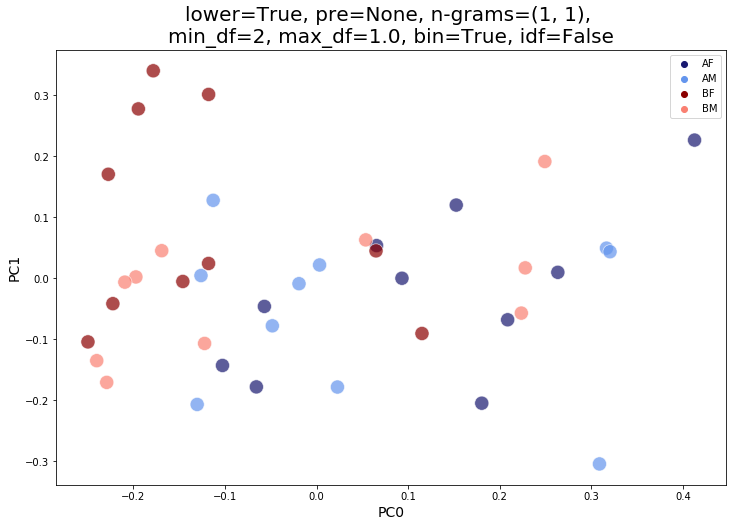

40 documents, 32048 features.
Explained variance: 0.089


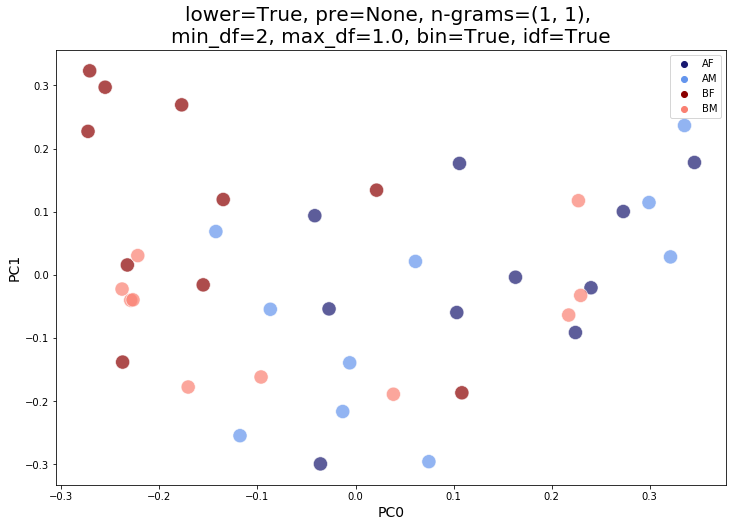

40 documents, 1292957 features.
Explained variance: 0.071


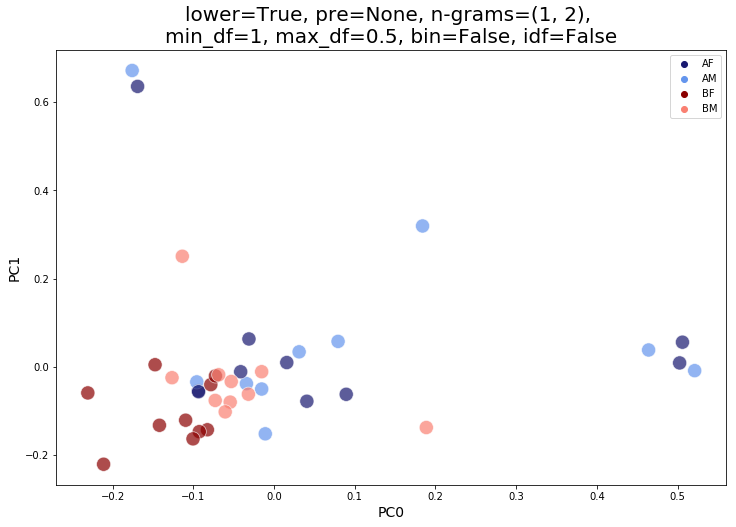

40 documents, 1292957 features.
Explained variance: 0.061


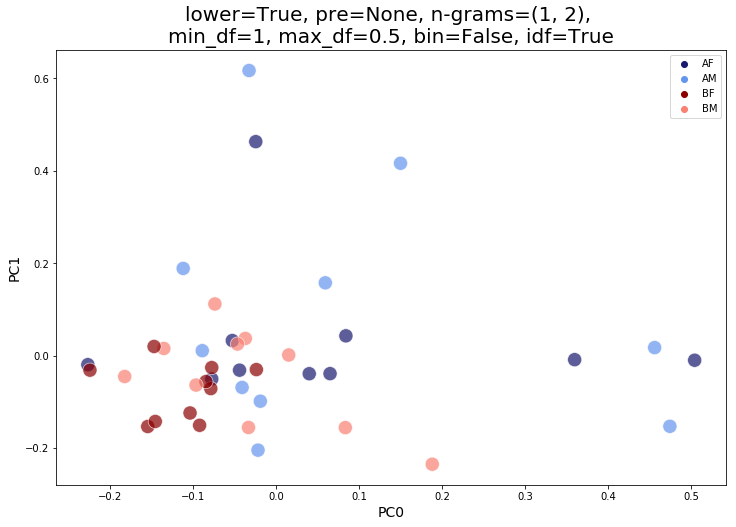

40 documents, 1292957 features.
Explained variance: 0.068


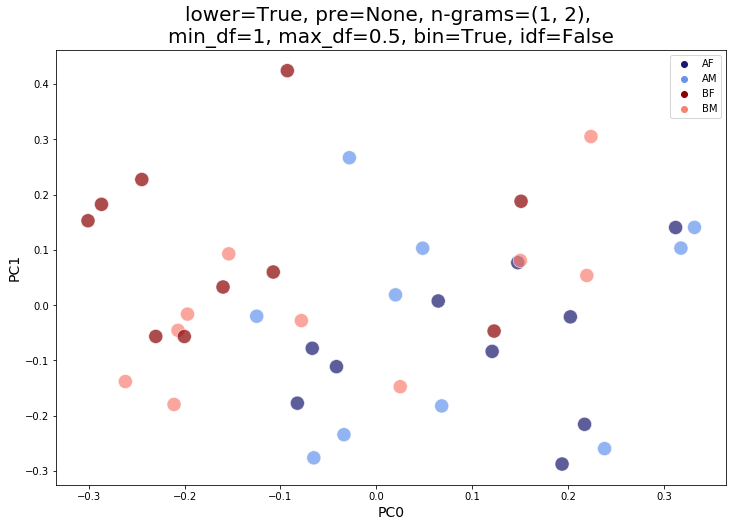

40 documents, 1292957 features.
Explained variance: 0.059


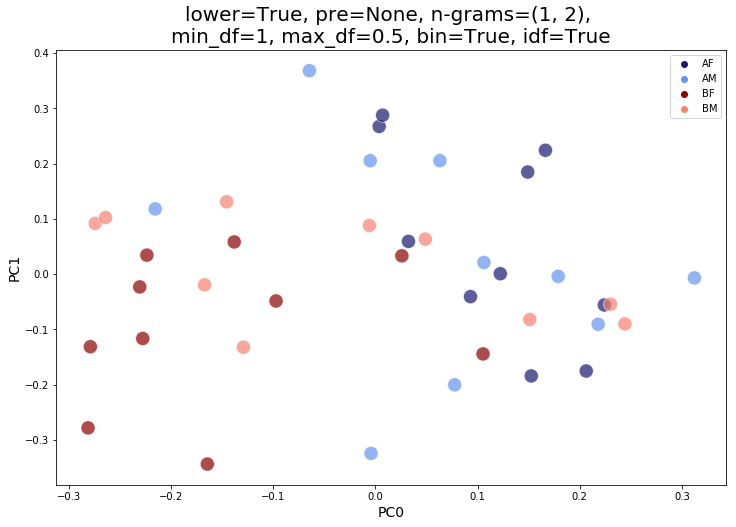

40 documents, 1308478 features.
Explained variance: 0.396


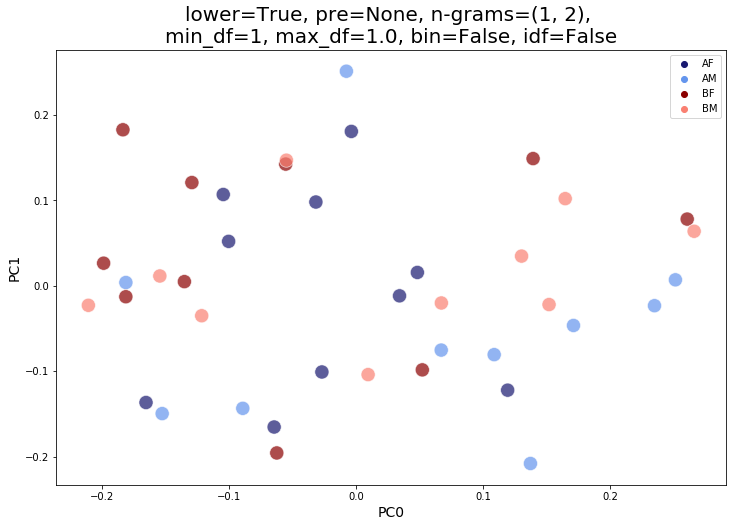

40 documents, 1308478 features.
Explained variance: 0.213


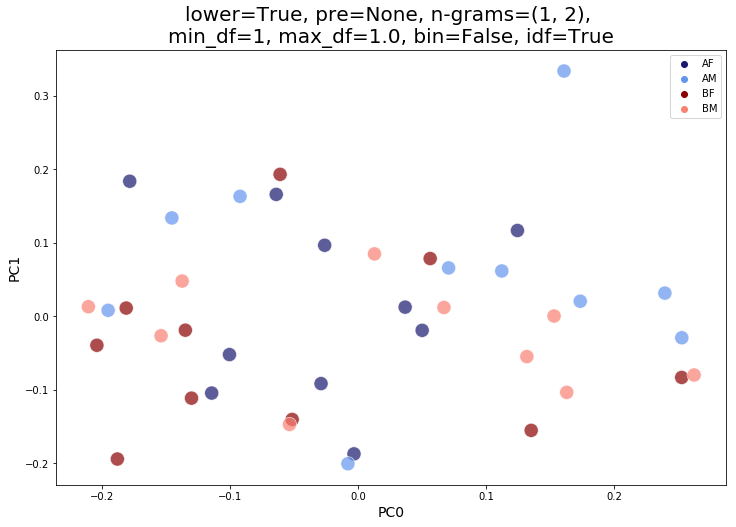

40 documents, 1308478 features.
Explained variance: 0.074


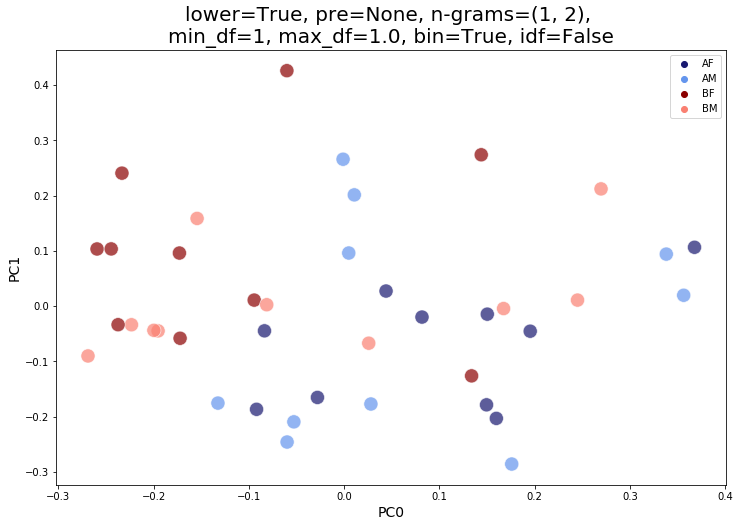

40 documents, 1308478 features.
Explained variance: 0.06


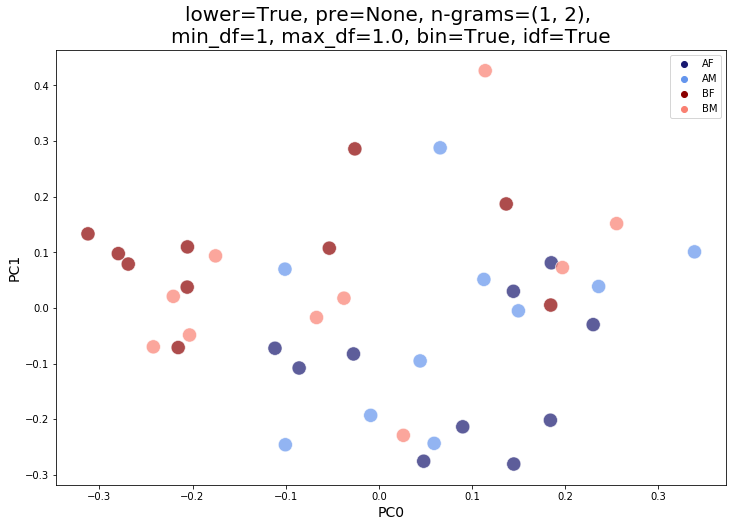

40 documents, 333770 features.
Explained variance: 0.08


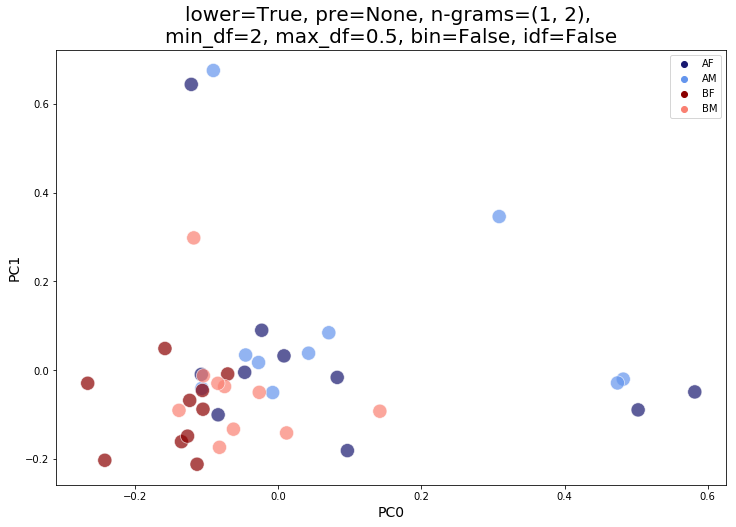

40 documents, 333770 features.
Explained variance: 0.072


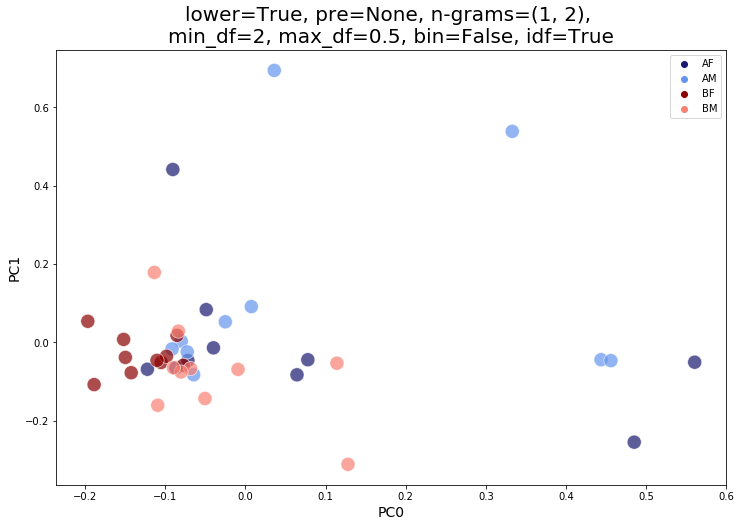

40 documents, 333770 features.
Explained variance: 0.081


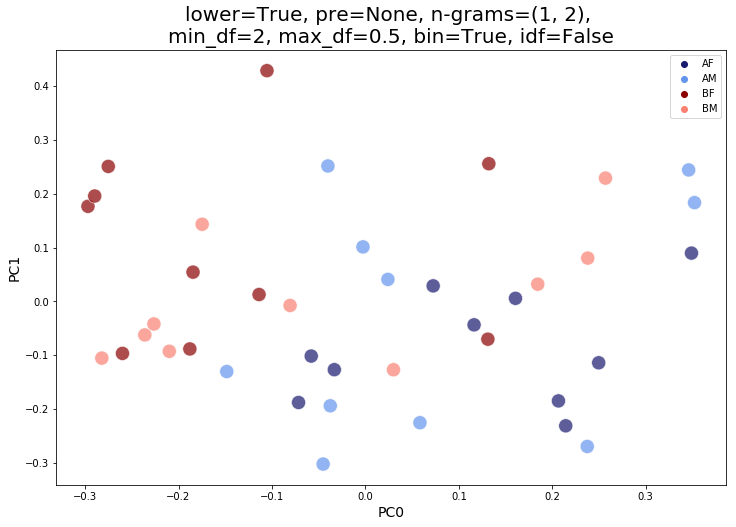

40 documents, 333770 features.
Explained variance: 0.073


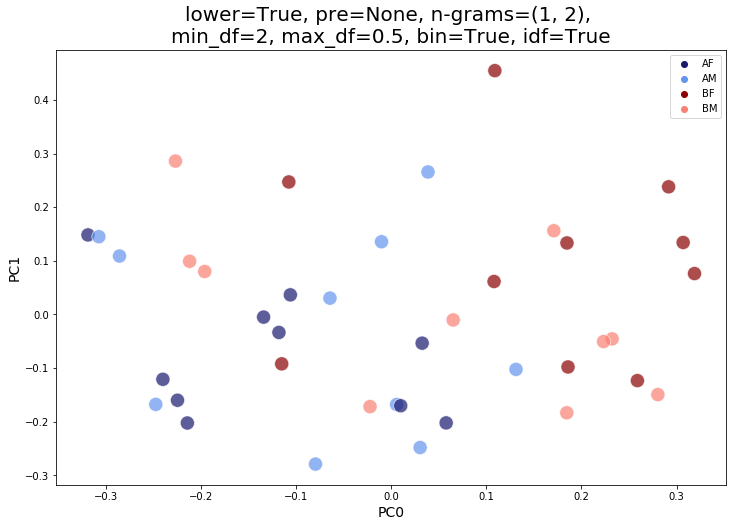

40 documents, 349291 features.
Explained variance: 0.41


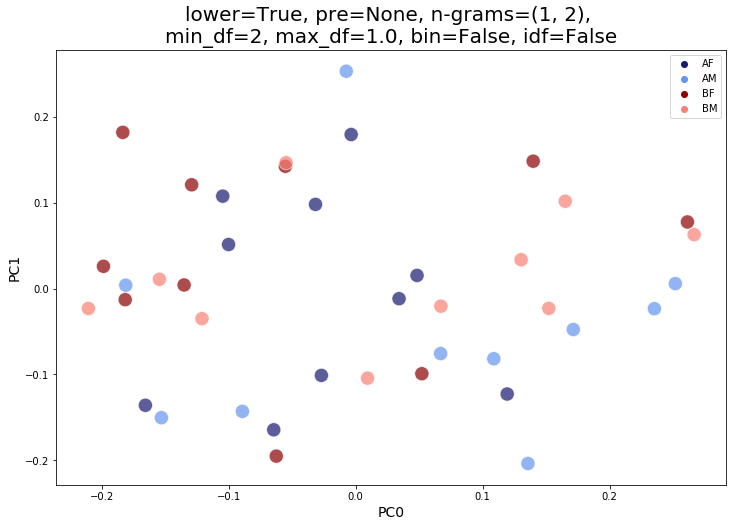

40 documents, 349291 features.
Explained variance: 0.276


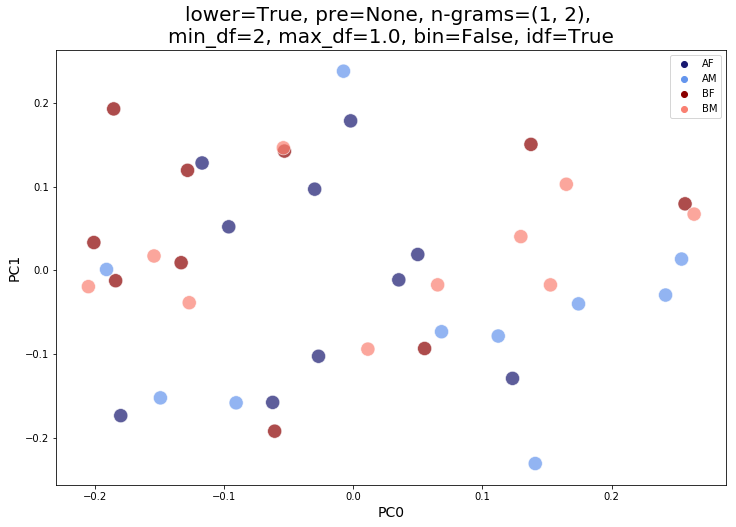

40 documents, 349291 features.
Explained variance: 0.091


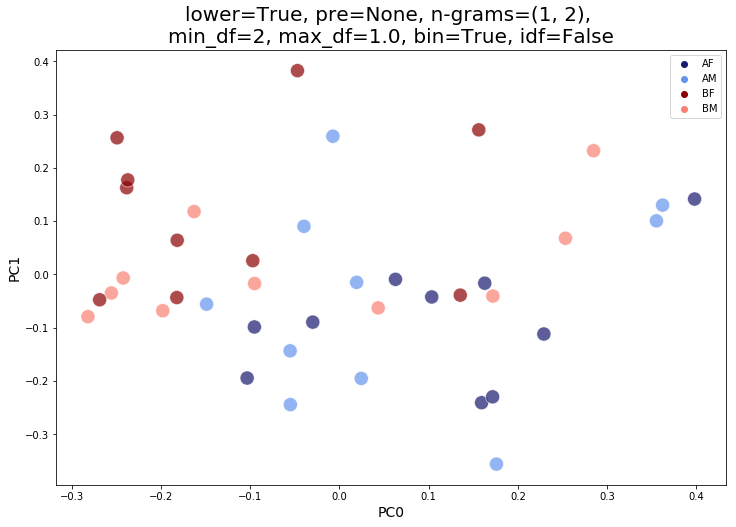

40 documents, 349291 features.
Explained variance: 0.075


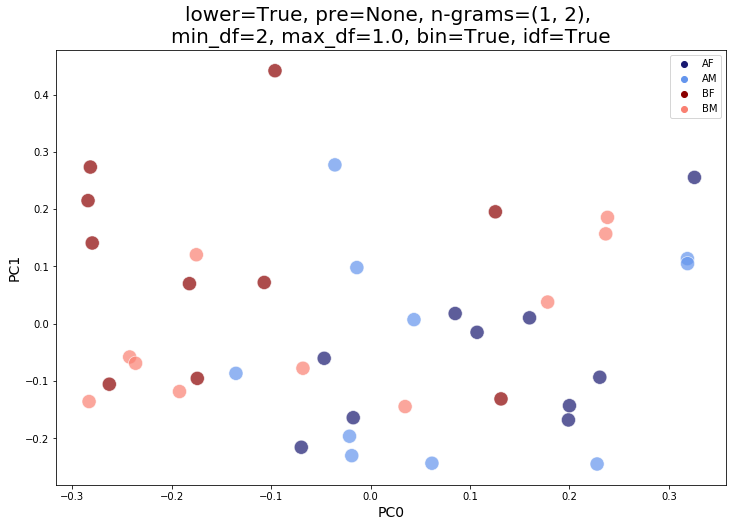

40 documents, 48784 features.
Explained variance: 0.076


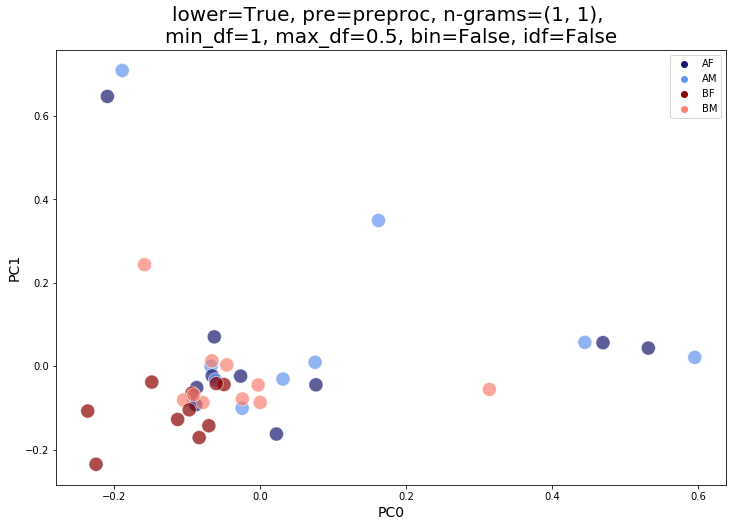

40 documents, 48784 features.
Explained variance: 0.065


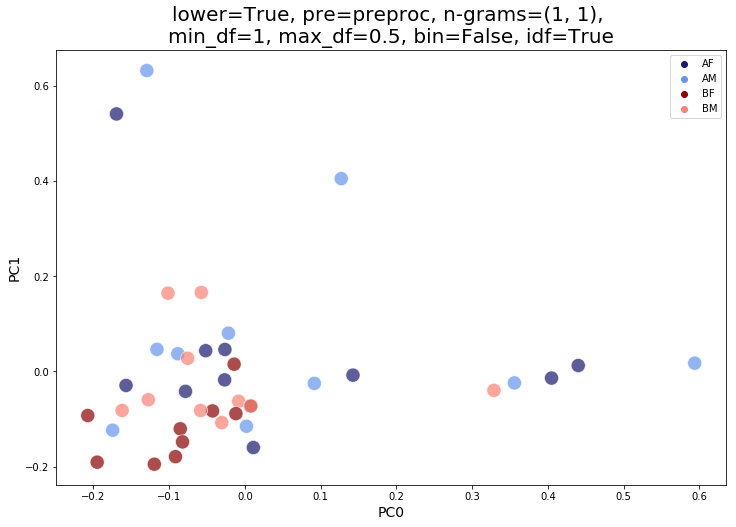

40 documents, 48784 features.
Explained variance: 0.089


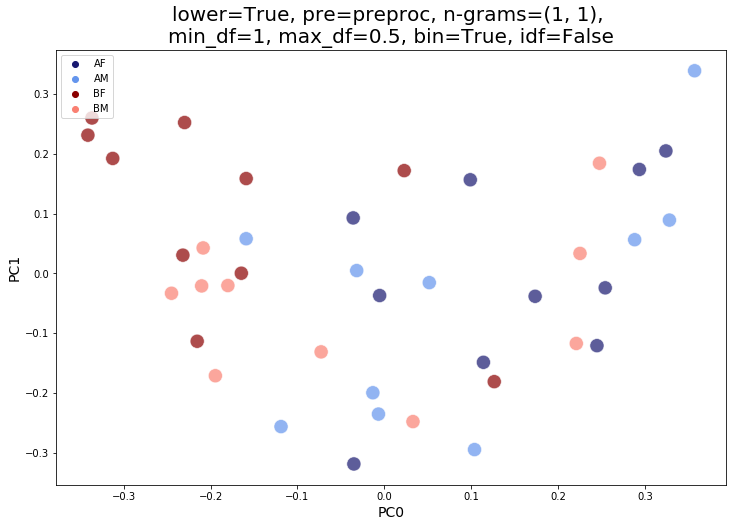

40 documents, 48784 features.
Explained variance: 0.076


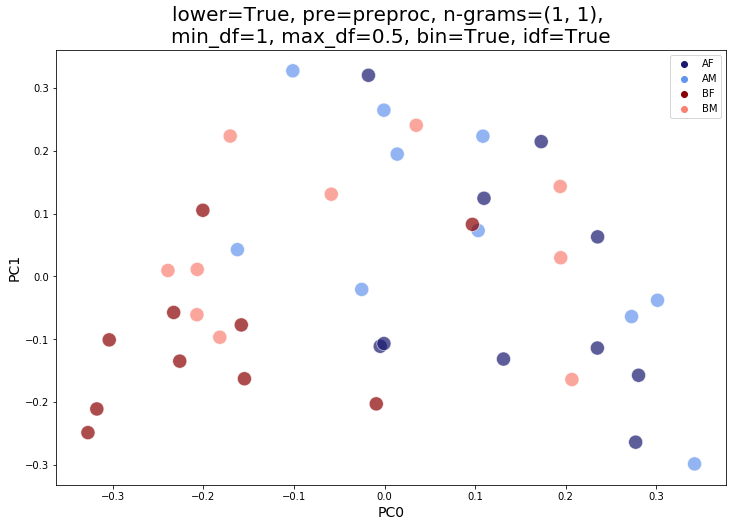

40 documents, 53864 features.
Explained variance: 0.414


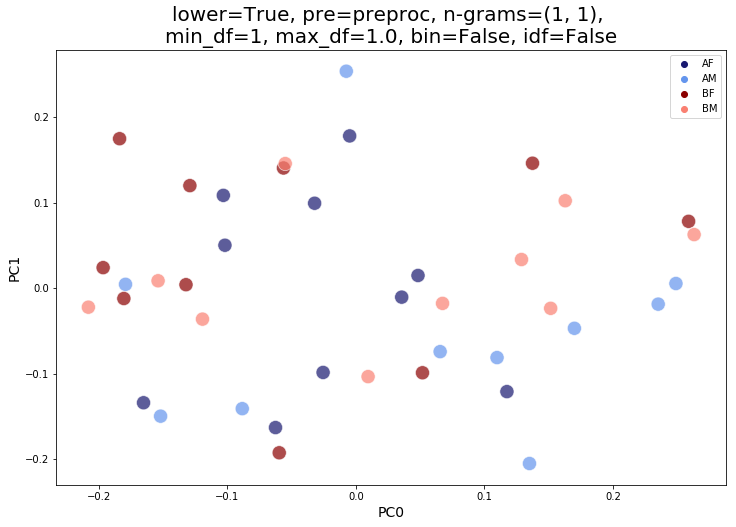

40 documents, 53864 features.
Explained variance: 0.242


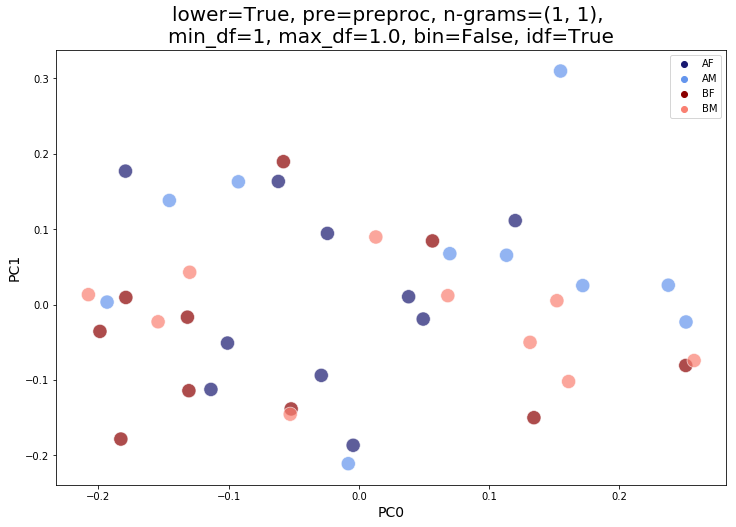

40 documents, 53864 features.
Explained variance: 0.105


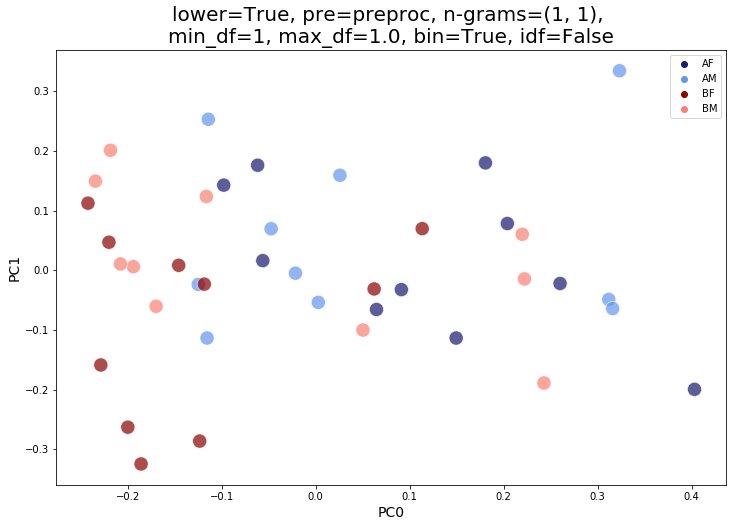

40 documents, 53864 features.
Explained variance: 0.08


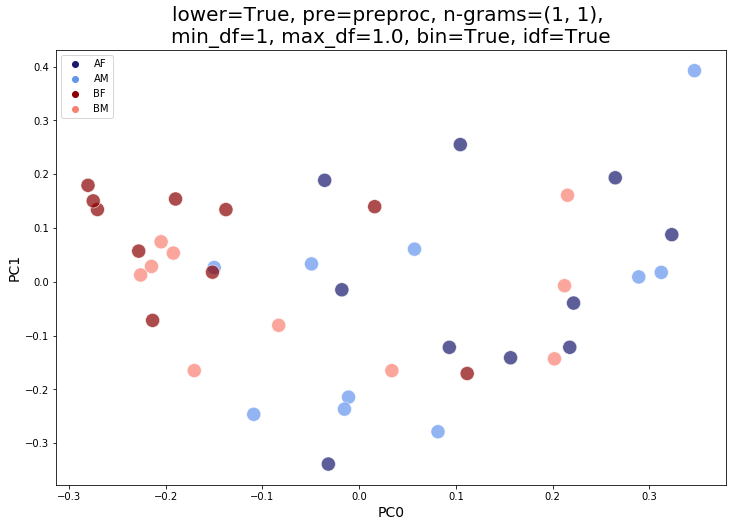

40 documents, 26968 features.
Explained variance: 0.084


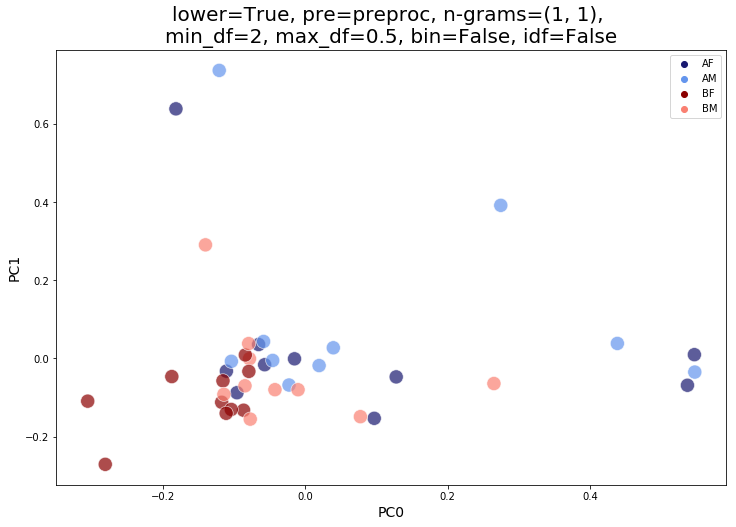

40 documents, 26968 features.
Explained variance: 0.076


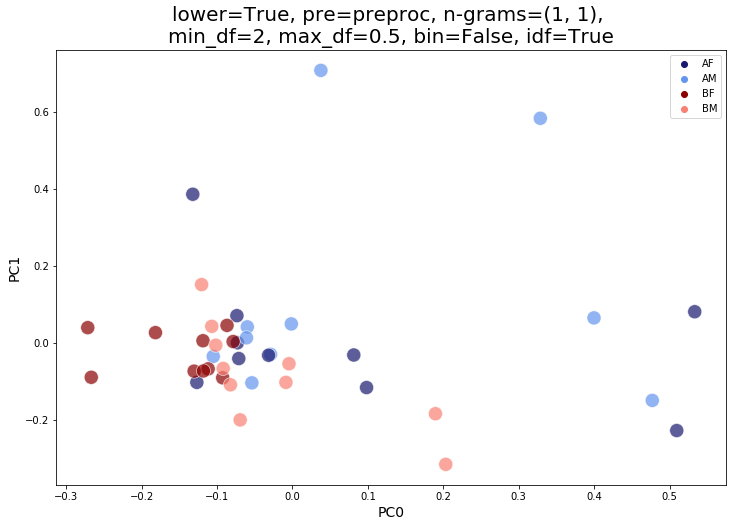

40 documents, 26968 features.
Explained variance: 0.095


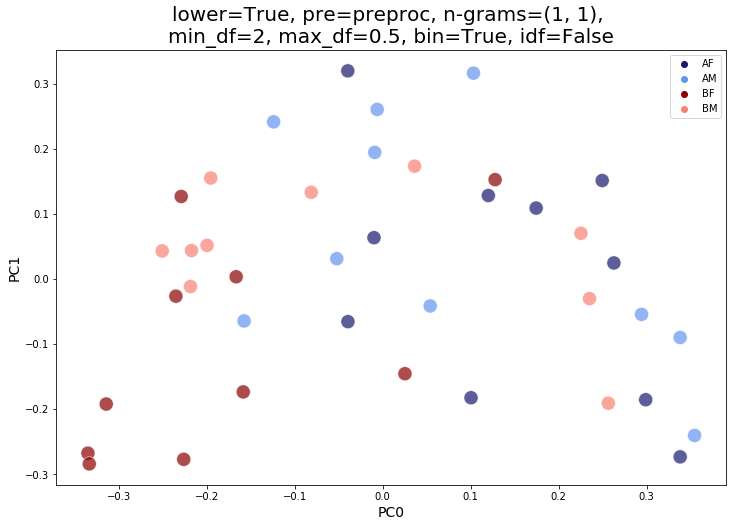

40 documents, 26968 features.
Explained variance: 0.085


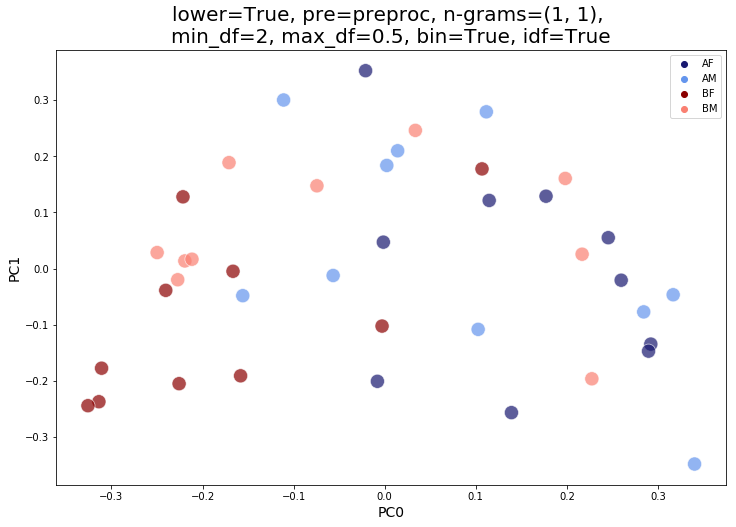

40 documents, 32048 features.
Explained variance: 0.425


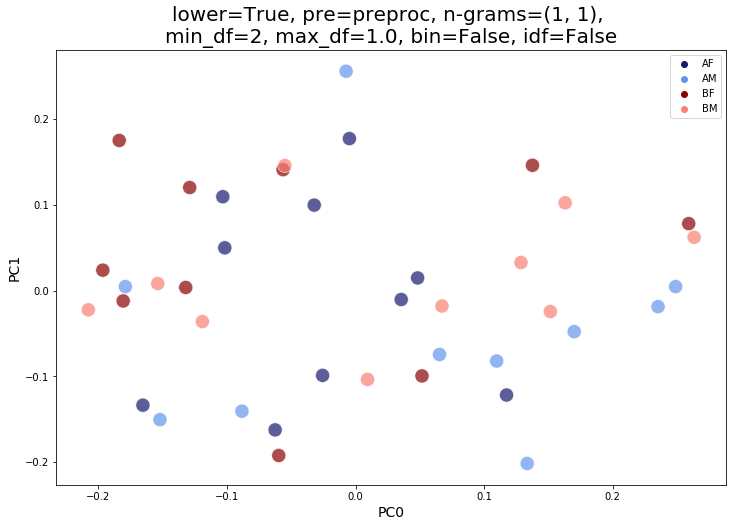

40 documents, 32048 features.
Explained variance: 0.297


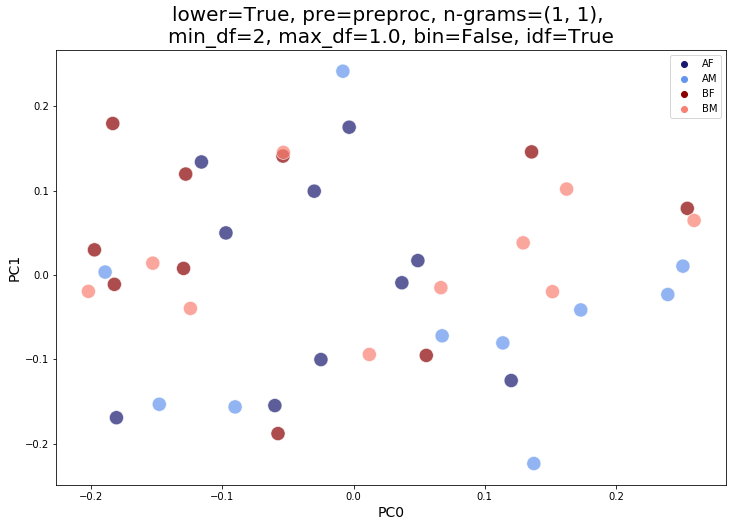

40 documents, 32048 features.
Explained variance: 0.112


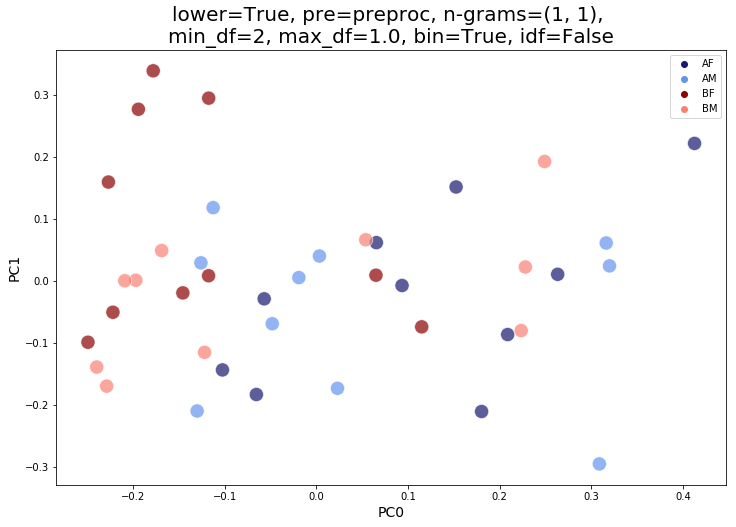

40 documents, 32048 features.
Explained variance: 0.089


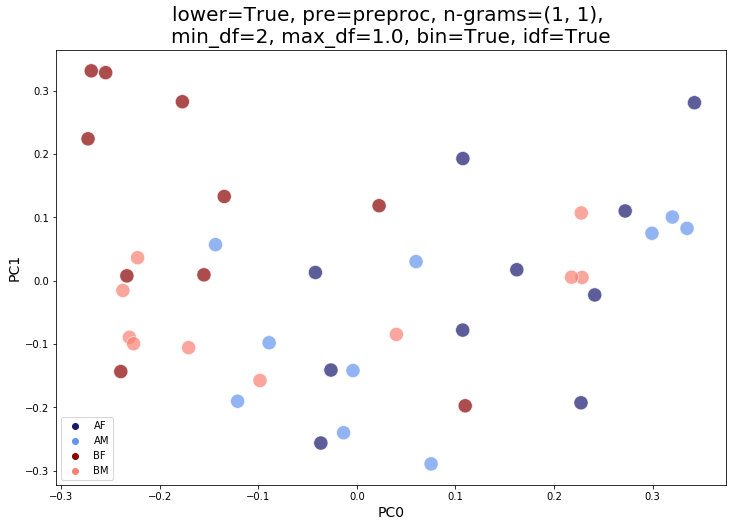

40 documents, 1292957 features.
Explained variance: 0.071


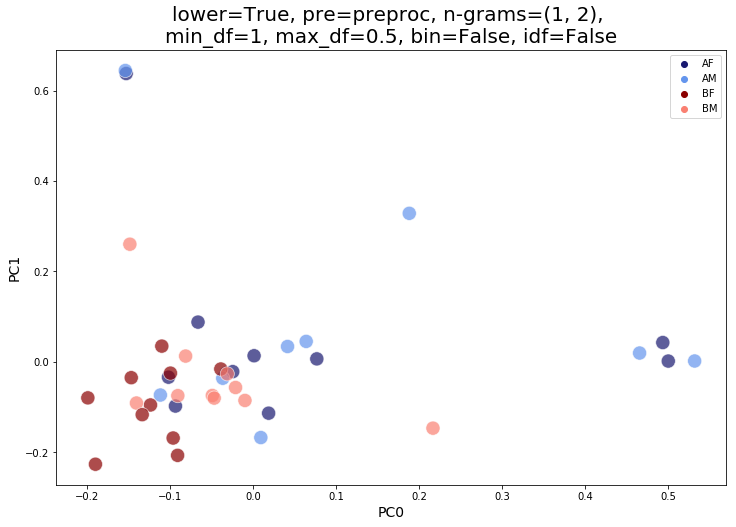

40 documents, 1292957 features.
Explained variance: 0.061


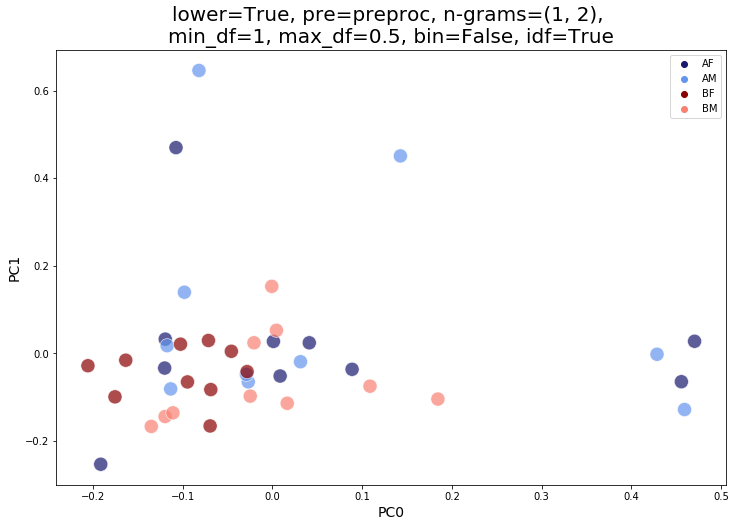

40 documents, 1292957 features.
Explained variance: 0.068


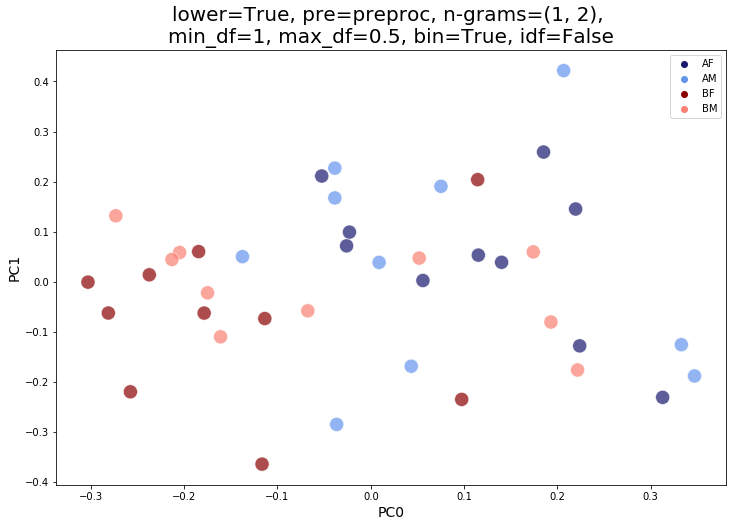

40 documents, 1292957 features.
Explained variance: 0.059


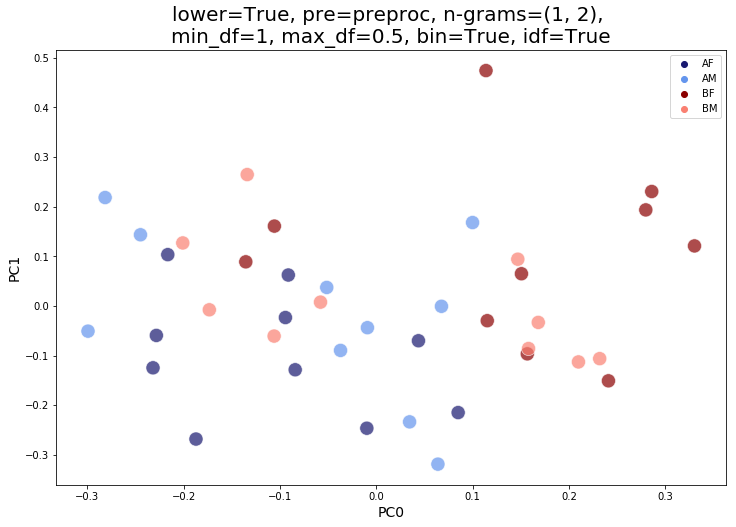

40 documents, 1308478 features.
Explained variance: 0.396


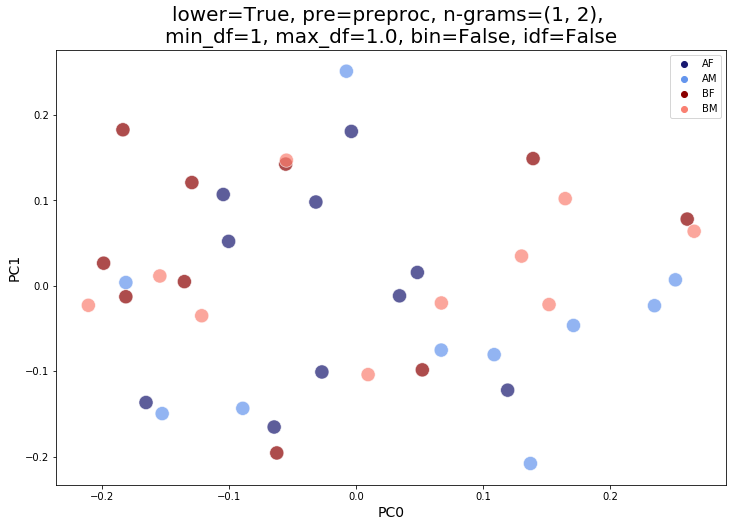

40 documents, 1308478 features.
Explained variance: 0.213


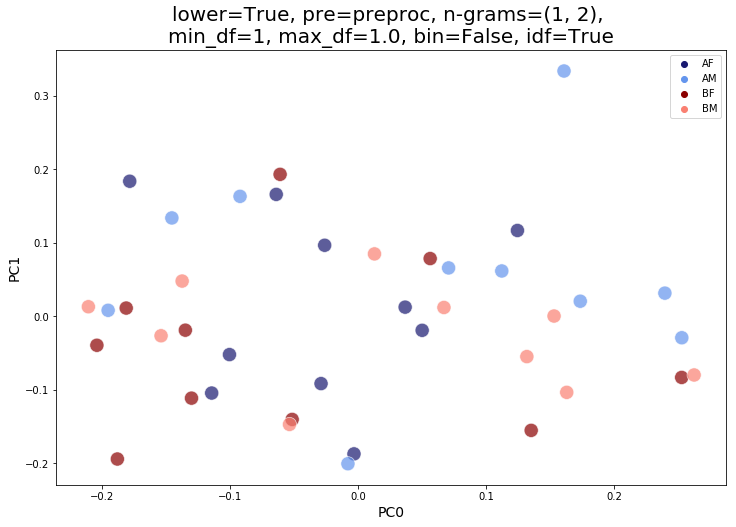

40 documents, 1308478 features.
Explained variance: 0.074


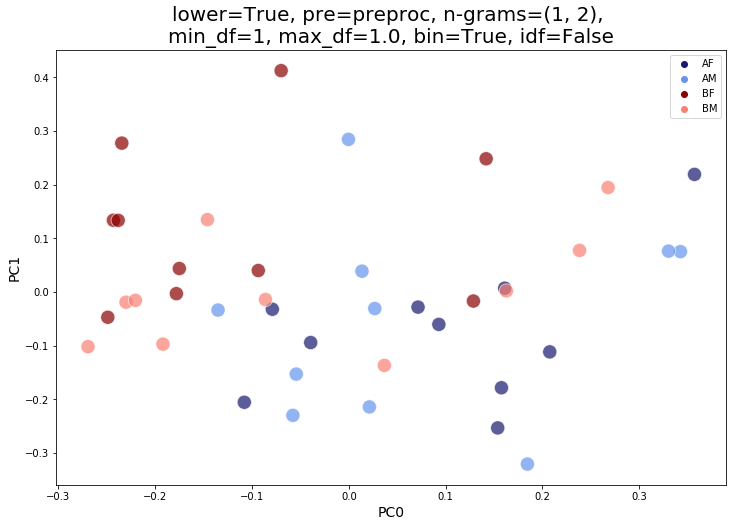

40 documents, 1308478 features.
Explained variance: 0.06


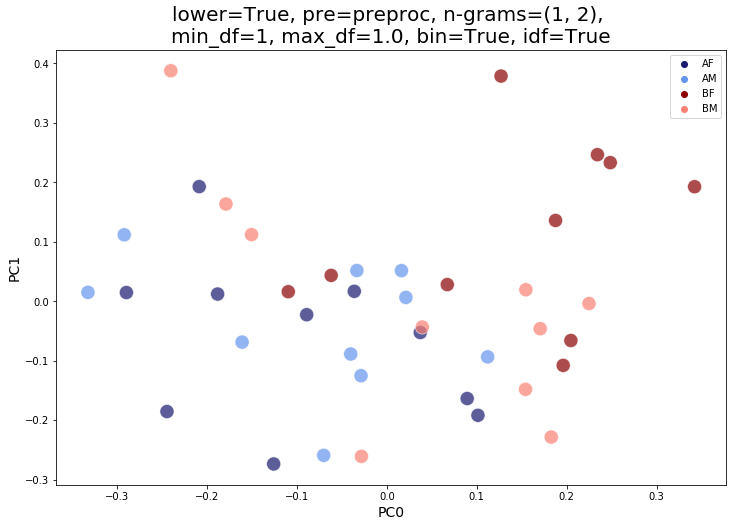

40 documents, 333770 features.
Explained variance: 0.079


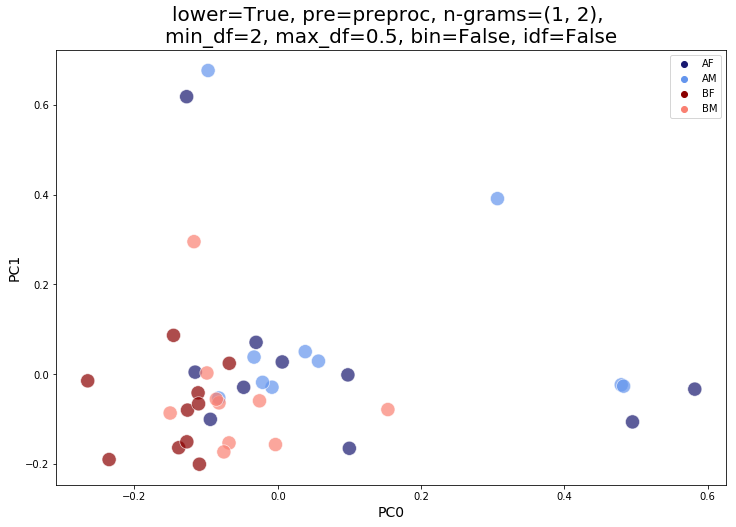

40 documents, 333770 features.
Explained variance: 0.072


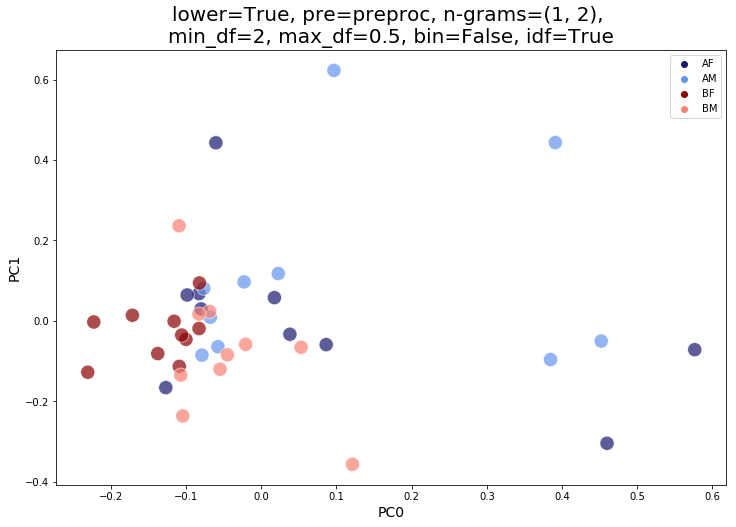

40 documents, 333770 features.
Explained variance: 0.081


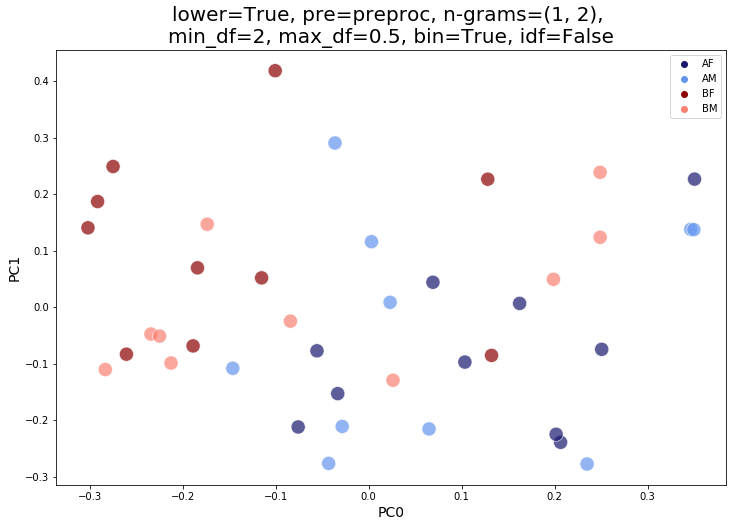

40 documents, 333770 features.
Explained variance: 0.073


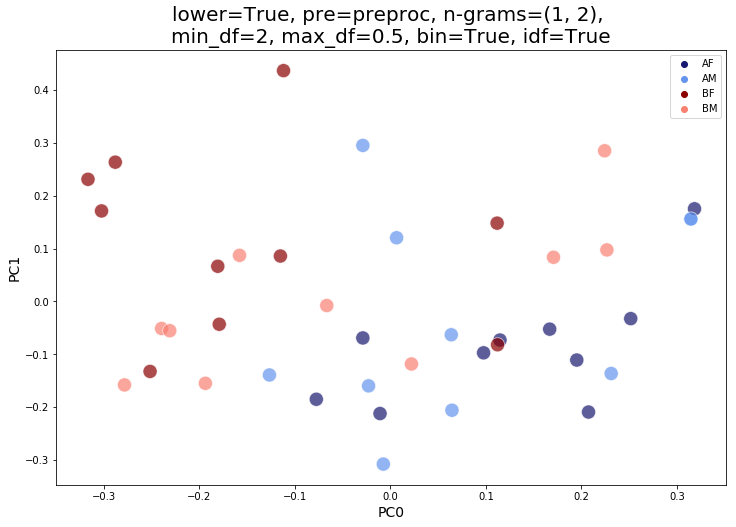

40 documents, 349291 features.
Explained variance: 0.41


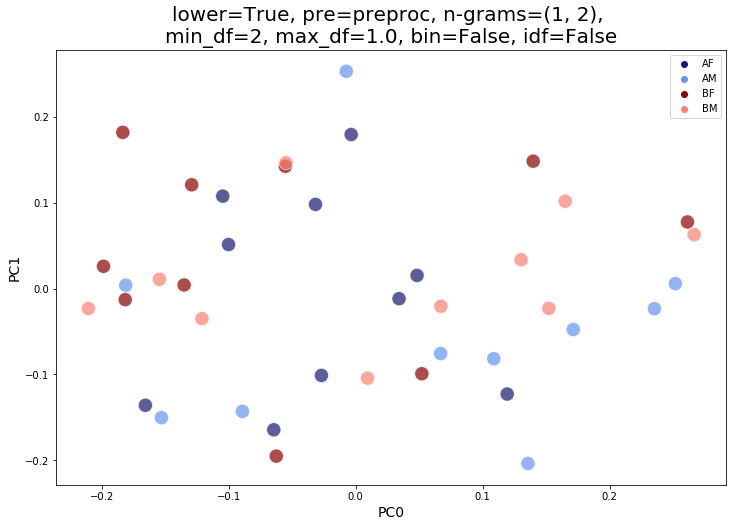

40 documents, 349291 features.
Explained variance: 0.276


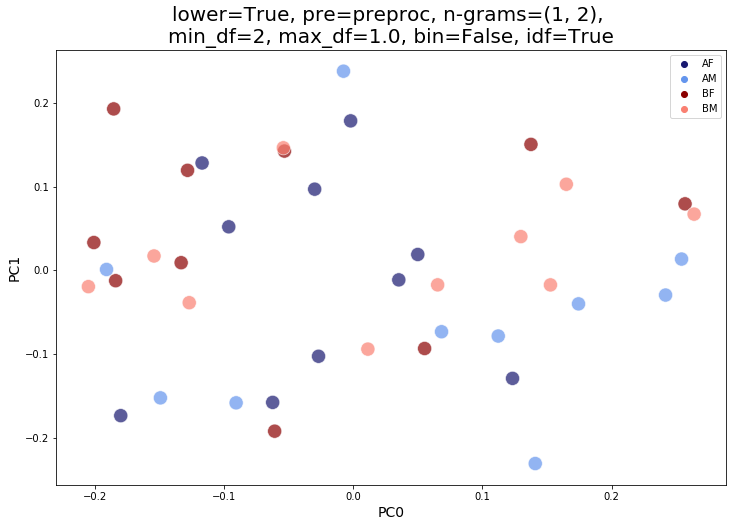

40 documents, 349291 features.
Explained variance: 0.091


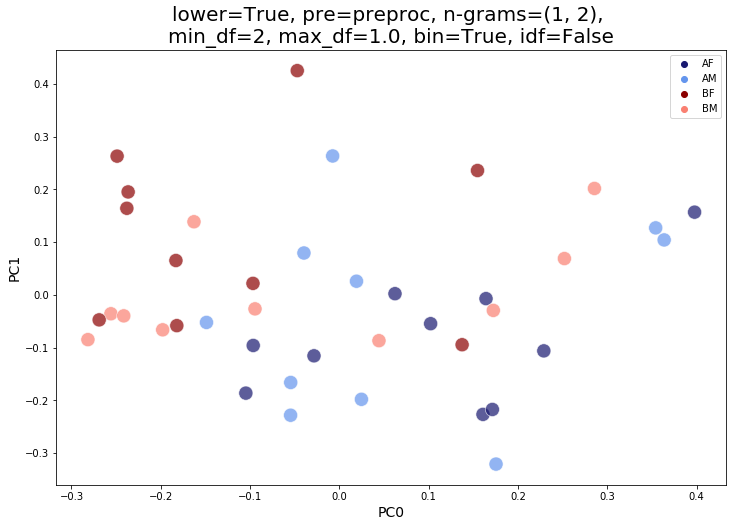

40 documents, 349291 features.
Explained variance: 0.075


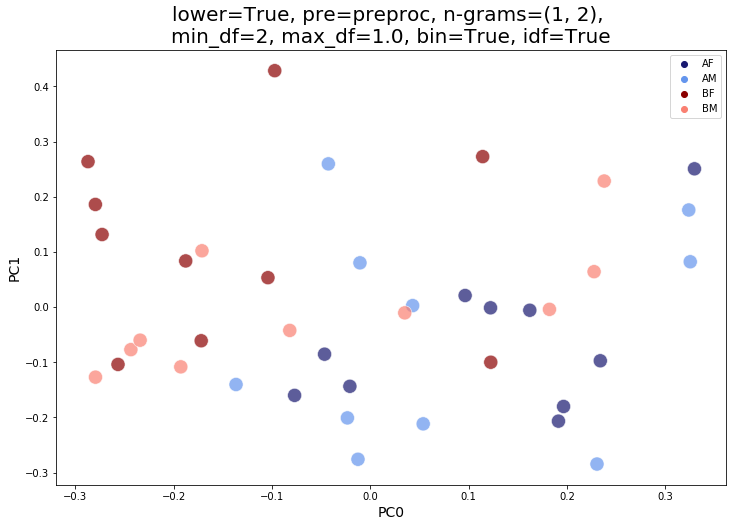

In [48]:
lc = [True]
pre = [None, preproc]
ngrams = [(1,1), (1,2)]
min_docs = [1, 2]
max_docs = [0.5, 1.0]
binarize = [False, True]
idf = [False, True]

def preproc(token):
    """
    Stems a token. Discards punctuation.
    """
    stem = nltk.stem.SnowballStemmer('english')
    if token in string.punctuation:
        return None
    else:
        return stem.stem(token)

for l in lc:
    for p in pre:
        for n in ngrams:
            for mn in min_docs:
                for mx in max_docs:
                    for b in binarize:
                        for i in idf:
                            if p is not None:
                                prep = 'preproc'
                            else:
                                prep = 'None'
                            title = f'lower={l}, pre={prep}, n-grams={n}, \nmin_df={mn}, max_df={mx}, bin={b}, idf={i}' 
                            
                            # Vectorize
                            tfidf = TfidfVectorizer(
                                lowercase=l,
                                preprocessor=p,
                                ngram_range=n,
                                max_df=mx,
                                min_df=mn,
                                binary=b,
                                use_idf=i
                            )
                            vectors = tfidf.fit_transform(corpus.docs())
                            print(f'{vectors.shape[0]} documents, {vectors.shape[1]} features.')

                            # Reduce dimensions with PCA
                            pca = PCA(n_components=2)
                            reduced = pca.fit_transform(vectors.toarray())
                            print("Explained variance:", round(sum(pca.explained_variance_ratio_),3))
                            
                            # Plot
                            plot_vectors(reduced, natgens, colors, title)

## Analysis

Finally, reflect on what you've observed. How do the different vectorization options seem to affect the output? Is there a combination of parameters that separates the classes especially well? Anything else that stands out to you about vectorization in this (quite small) case?